In [1]:
import sklearn
import pandas as pd
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

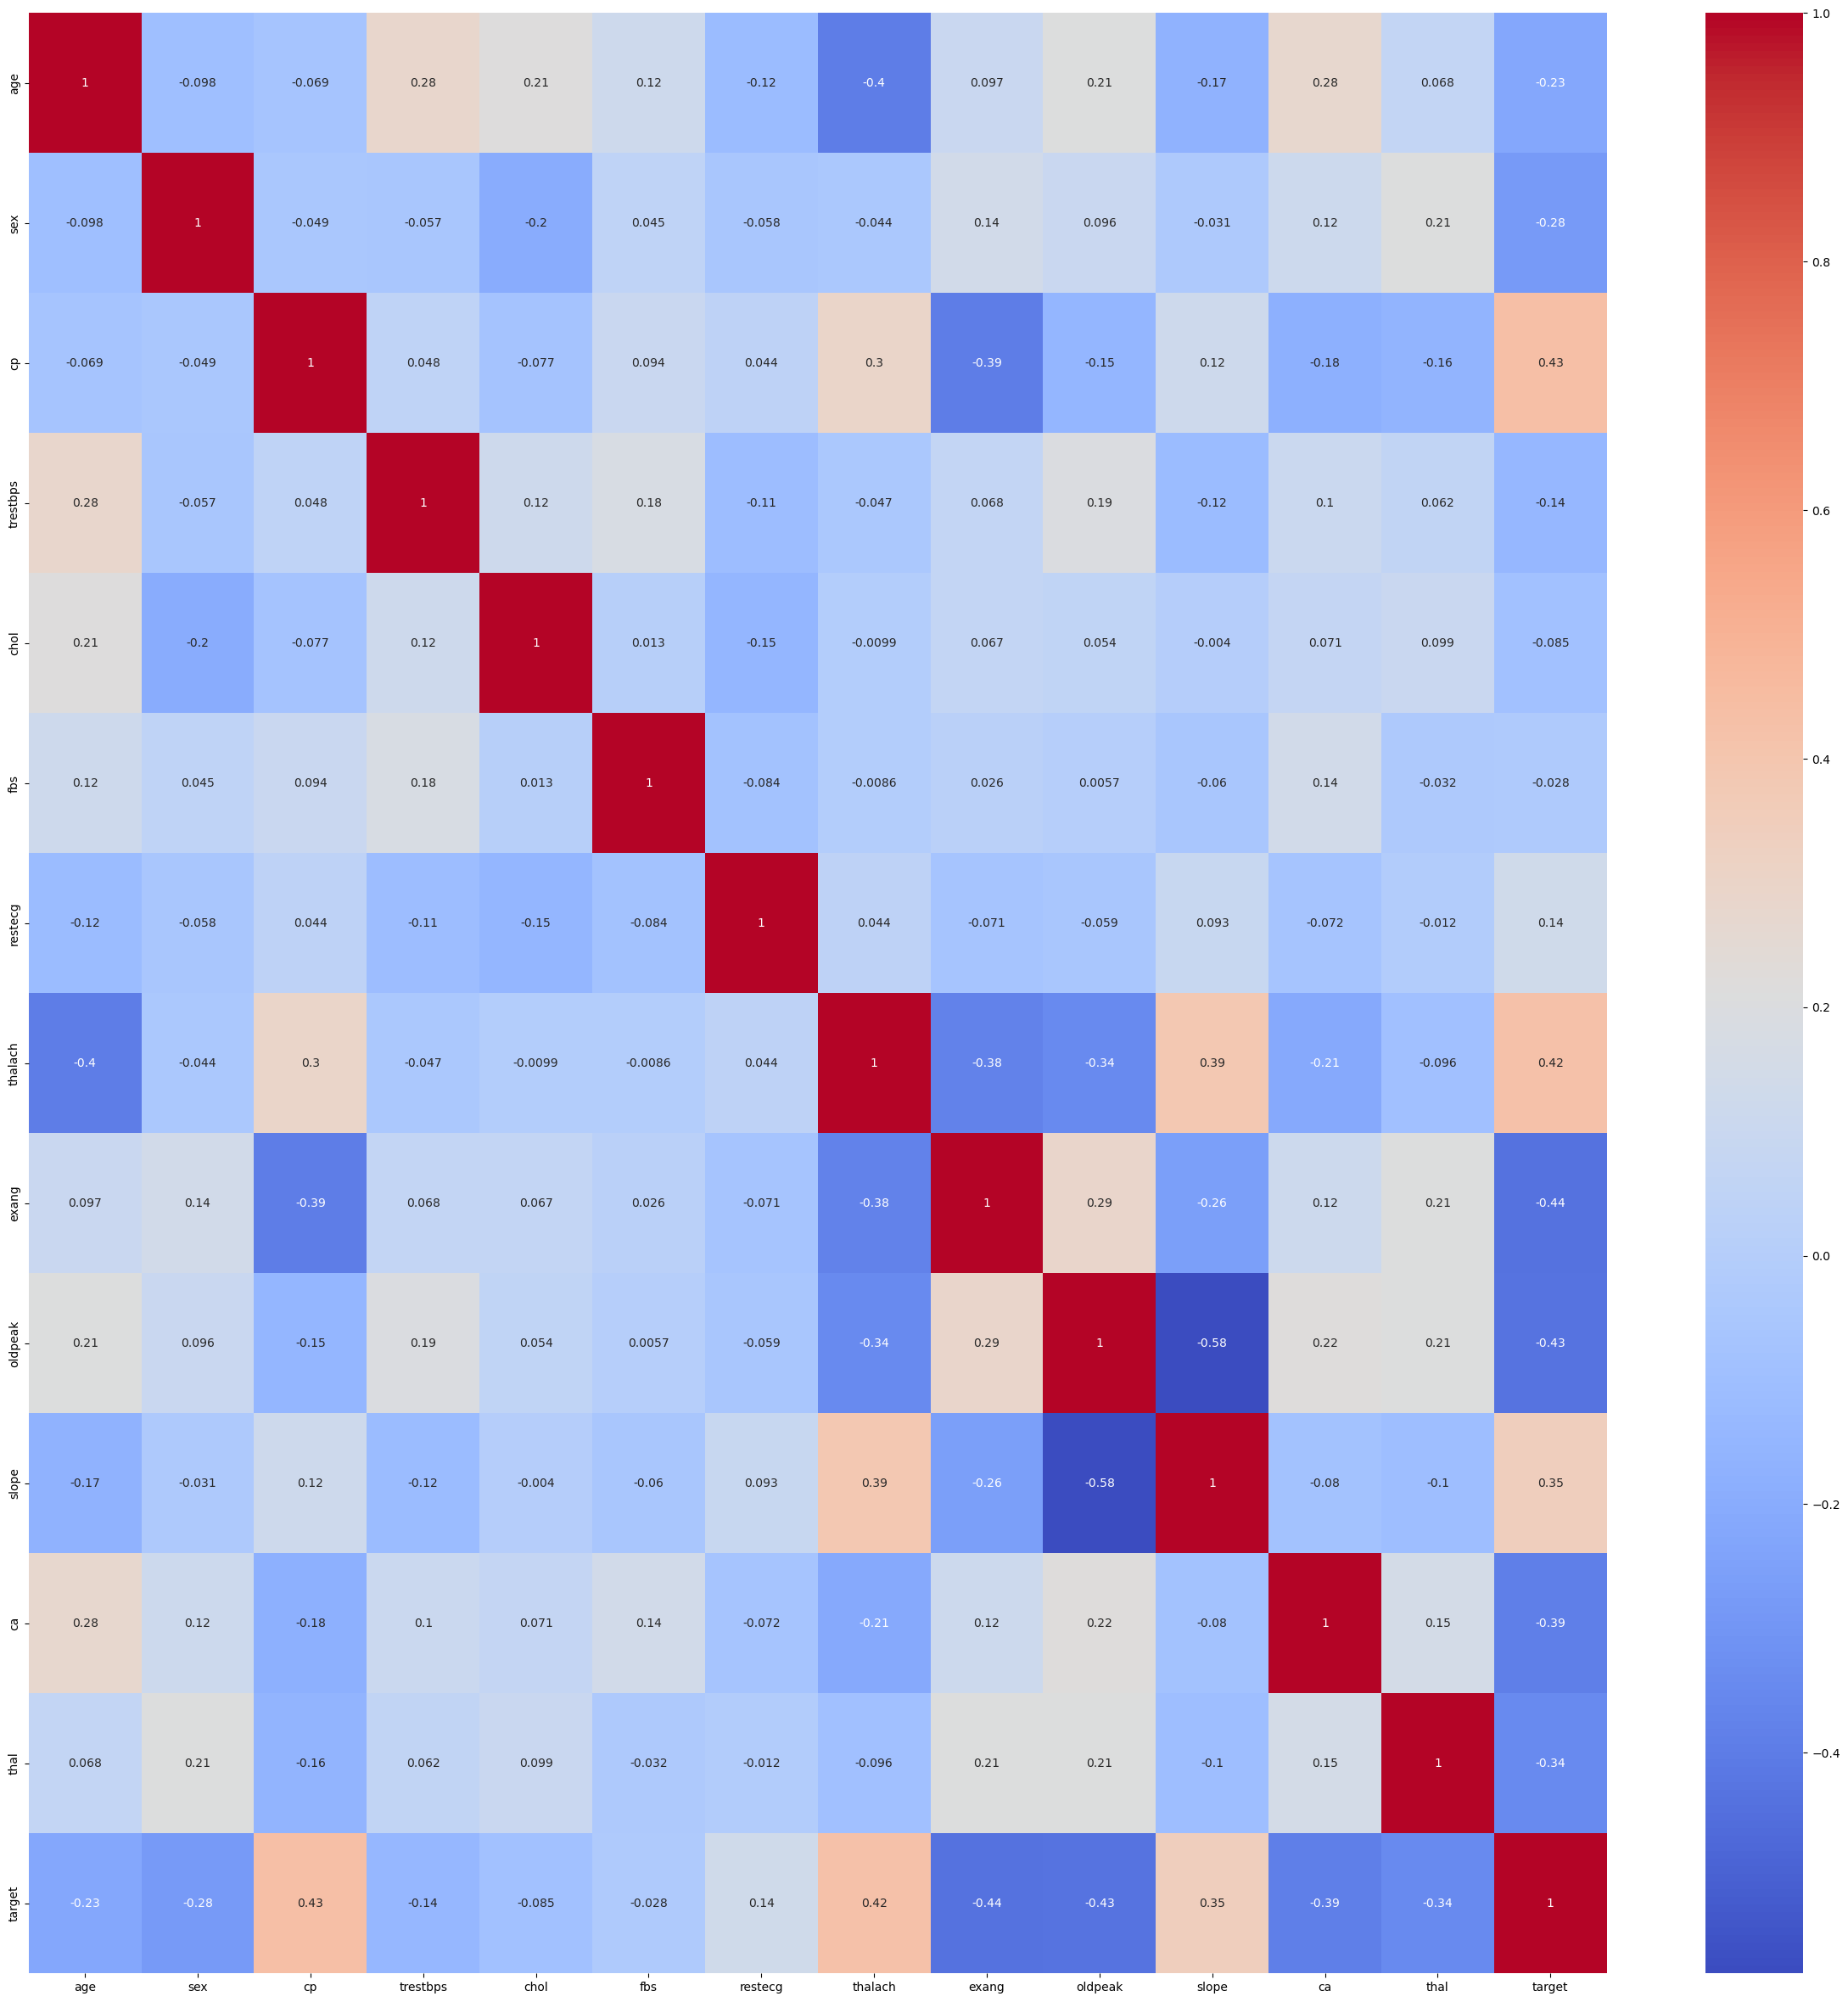

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')

In [4]:
print(corr_matrix["target"].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


Top 2 are "cp" and "exang"

## Model Training


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
  
lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

acc_lr = classification_report(y_test, y_pred_lr)
acc_dt = classification_report(y_test, y_pred_dt)

print('Logistic Regression:',acc_lr)
print('Decision Tree:',acc_dt)

Logistic Regression:               precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.83        59

    accuracy                           0.80       101
   macro avg       0.80      0.80      0.80       101
weighted avg       0.80      0.80      0.80       101

Decision Tree:               precision    recall  f1-score   support

           0       0.65      0.81      0.72        42
           1       0.84      0.69      0.76        59

    accuracy                           0.74       101
   macro avg       0.75      0.75      0.74       101
weighted avg       0.76      0.74      0.74       101



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Training with PCA


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca.fit(X_scaled)
X_PCA = pca.fit(X_scaled)

X_pca = X_PCA.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=1/3, random_state=42)
  
lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

acc_lr = classification_report(y_test, y_pred_lr)
acc_dt_1 = classification_report(y_test, y_pred_dt)

print('Logistic Regression:',acc_lr)
print('Decision Tree:',acc_dt_1)

Logistic Regression:               precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        59

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

Decision Tree:               precision    recall  f1-score   support

           0       0.66      0.79      0.72        42
           1       0.82      0.71      0.76        59

    accuracy                           0.74       101
   macro avg       0.74      0.75      0.74       101
weighted avg       0.76      0.74      0.74       101



With PCA we got better results

Logistic Regression:


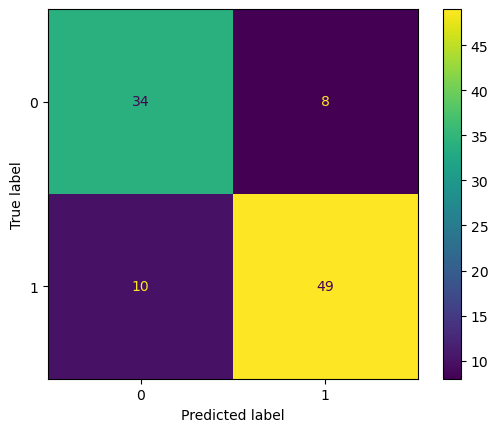

Decision Tree


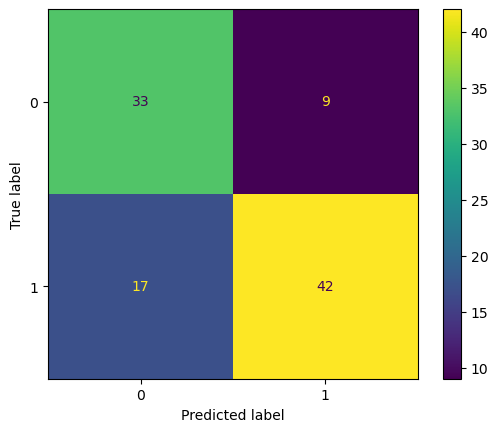

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
print('Logistic Regression:')
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()
print('Decision Tree')
disp2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

## Model Surface

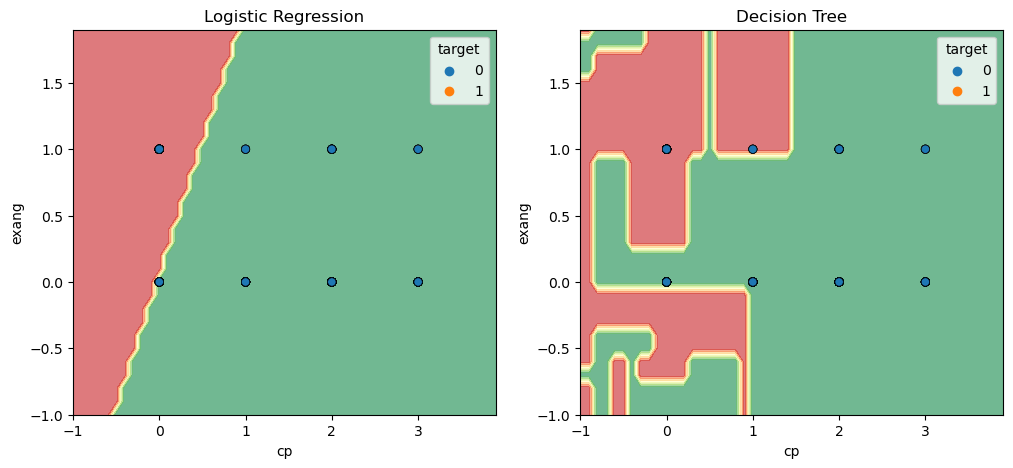

In [10]:
import numpy as np
min1, max1 = X['cp'].min()-1, X['cp'].max()+1
min2, max2 = X['exang'].min()-1, X['exang'].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))


yhat1 = lr.predict(grid)
zz1 = yhat1.reshape(xx.shape)

yhat2 = dt.predict(grid)
zz2 = yhat2.reshape(xx.shape)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].contourf(xx, yy, zz1, cmap='RdYlGn_r', alpha=0.6)
ax[0].set_title('Logistic Regression')

ax[1].contourf(xx, yy, zz2, cmap='RdYlGn_r', alpha=0.6)
ax[1].set_title('Decision Tree')

for i in range(2):
    ax[i].set_xlabel('cp')
    ax[i].set_ylabel('exang')
    sns.scatterplot(x='cp', y='exang', hue='target', data=df, edgecolor='k', ax=ax[i])

plt.show()

## Hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

params_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10,20,25],
    'min_samples_leaf': [5,10,20],
    'min_weight_fraction_leaf': [0.0, 0.25, 0.5],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [1,5,10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
}

gscv = GridSearchCV(clf, params_grid, cv=5,return_train_score=True)

# Fit the grid search object to the data
gscv.fit(X_pca, y)

# Print the best parameters
print(gscv.best_params_)
parm = gscv.best_params_

{'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6750 fits failed out of a total of 33750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6750 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py",

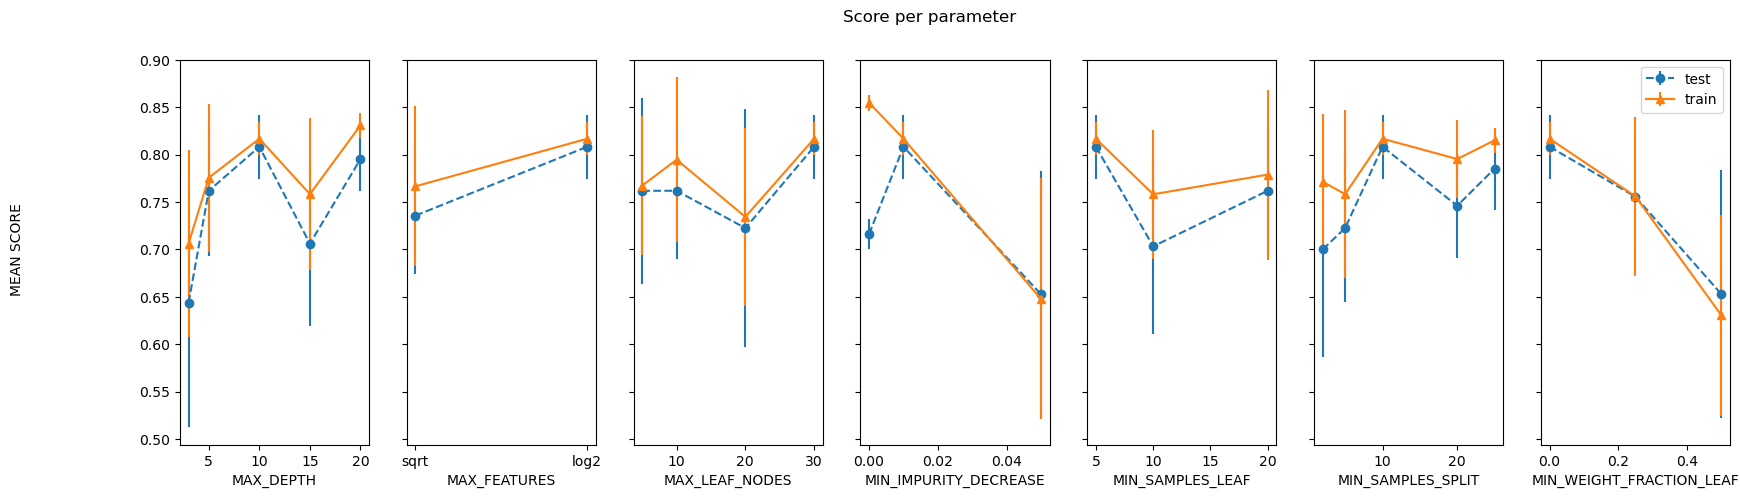

In [12]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks = []
    masks_names = list(grid.best_params_.keys())
    
    for p_k, p_v in grid.best_params_.items():
        if p_v == None:
            p_v = 'None'# Check if the parameter value is None
            masks.append(list(results['param_'+p_k].data == p_v))
        else:
            masks.append(list(results['param_'+p_k].data == p_v))

    params = grid.param_grid
    
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(gscv)

## Model training with tuning

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=1/3, random_state=42)
  

dt = DecisionTreeClassifier(max_depth= parm['max_depth'],
                            min_samples_split= parm['min_samples_split'],
                            min_samples_leaf=parm['min_samples_leaf'],
                            min_weight_fraction_leaf= parm['min_weight_fraction_leaf'],
                            max_features= parm['max_features'],
                            max_leaf_nodes= parm['max_leaf_nodes'],
                            min_impurity_decrease= parm['min_impurity_decrease'])
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


acc_dt = classification_report(y_test, y_pred_dt)

print('Decision Tree without hyperparameter tuning:',acc_dt_1)
print('Decision Tree with hyperparameter tuning:',acc_dt)

Decision Tree without hyperparameter tuning:               precision    recall  f1-score   support

           0       0.66      0.79      0.72        42
           1       0.82      0.71      0.76        59

    accuracy                           0.74       101
   macro avg       0.74      0.75      0.74       101
weighted avg       0.76      0.74      0.74       101

Decision Tree with hyperparameter tuning:               precision    recall  f1-score   support

           0       0.81      0.71      0.76        42
           1       0.81      0.88      0.85        59

    accuracy                           0.81       101
   macro avg       0.81      0.80      0.80       101
weighted avg       0.81      0.81      0.81       101



## Tree visualization

[Text(0.625, 0.875, 'cp <= 0.965\ngini = 0.499\nsamples = 202\nvalue = [96, 106]\nclass = 1'),
 Text(0.5, 0.625, 'exang <= -0.563\ngini = 0.41\nsamples = 146\nvalue = [42, 104]\nclass = 1'),
 Text(0.25, 0.375, 'cp <= -0.859\ngini = 0.5\nsamples = 49\nvalue = [24, 25]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.34\nsamples = 23\nvalue = [5, 18]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.393\nsamples = 26\nvalue = [19, 7]\nclass = 0'),
 Text(0.75, 0.375, 'cp <= -1.045\ngini = 0.302\nsamples = 97\nvalue = [18, 79]\nclass = 1'),
 Text(0.625, 0.125, 'gini = 0.043\nsamples = 45\nvalue = [1, 44]\nclass = 1'),
 Text(0.875, 0.125, 'gini = 0.44\nsamples = 52\nvalue = [17, 35]\nclass = 1'),
 Text(0.75, 0.625, 'gini = 0.069\nsamples = 56\nvalue = [54, 2]\nclass = 0')]

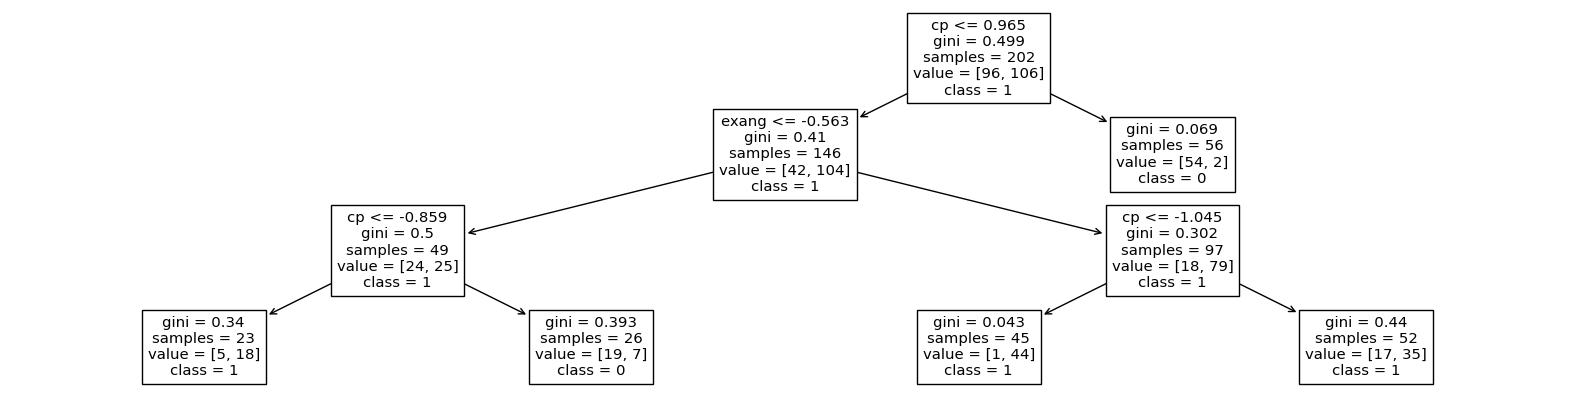

In [14]:
from sklearn.tree import export_graphviz
from sklearn import tree
fig = plt.figure(figsize=(20,5))

tree.plot_tree(dt,class_names=['0','1'], feature_names=['cp','exang'])